# Titanic - Exploratory Data Analysis using Python  
### This Titanic project is my first ever Exploratory Data Analysis project. Yay!  

I'm really excited to get started.  
It will be my first attempt at learning about and using Pandas and Seaborn for my data analysis and visualisation.  


### Who would live and who would die?  
I hope to be able to obtain interesting insights from the dataset about the passengers of Titanic & to explore the factors that might have played a part in determining their fate.  
## Part 1: Using Pandas for Titanic  

### First, I will start by importing the required libraries - in this case, Pandas.  
Pandas stands for “Python Data Analysis Library ”. It is used for data manipulation and analysis. 

In [1]:
import pandas as pd

### Now, I need to import the Titanic dataset.  

I obtained the dataset from [Kaggle](https://www.kaggle.com/c/titanic/data?select=train.csv).  

We often work with datasets in Comma Separated Value (CSV) files.  


In [2]:
# Import the CSV file into Python using read_csv() from pandas
df=pd.read_csv('train.csv')

### With the data imported, I want to obtain a quick, summarised overview of the data fields to generally understand the dataset.  

In [4]:
# Use .info( ) in Pandas to print a concise summary of a DataFrame
df.info()

# To see how many values in the data fields are null
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### From above, I see that there are 12 unique column field names, called:   

- PassengerId
- Survived (0 = Did not Survive; 1 = Survived)
- Pclass: Passenger Class (1 / 2 / 3)
- Name
- Sex
- Age
- SibSp: Number of Siblings/ Spouses aboard Titanic
- Parch: Number of Parents/ Children aboard Titanic
- Ticket: Ticket Number
- Fare: Ticket Fare Price
- Cabin: Cabin No.
- Embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  
    
### I also see that there are 891 unique passengers & rows of data corresponding to each passenger.  

'Age', 'Cabin' and 'Embarked' column fields have 177, 687, 2 missing values respectively.  
Out of all column fields, 'Cabin' has the least non-null values, i.e. most of its values are null.  

### The 'Cabin' column has too many missing values, so I will drop it from my dataset.  

In [76]:
# Clean the data by dropping data fields that are irrelevant or not useful for analysis using .drop( )

df.drop(['Cabin'], axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


### I can view the quick overview of the stats for each data field to get some general insights.  

### Key Insights:  
*(in General)* (from below table)  
1. ***Passengers are more likely to die than survive***, as the mean of 'Survived' is <0.5. ***Survival rate is about 38%***.  
2. The ***average age of the passengers is <30 years old***, and ***the oldest passenger is 80 years old***.  
3. ***There are passengers who got their ticket for free*** and ***the most expensive ticket is about $512***.  

I'm so glad I never took a ride similar to the Titanic, or I would likely not be sitting here typing this now.  
Most of the passengers on Titanic were quite young, it's a pity especially for all the young lives lost.  

There were people who got a free pass to the intense Titanic experience and I wonder if whoever paid 512 dollars for a ticket survived the journey.  
(Edit: I found the answer below in part (g). Perhaps it was money well spent for these high spenders as they all survived!)    

In [96]:
# Obtain some stats for each data field using .describe()
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### And I can find out if some data fields are correlated inversely or proportionately to one another.  

### Key Insights:  
*(Relational)* (from below table)  

4. PClass & Survived has a correlation coefficient of -0.338 i.e. ***the higher the PClass number (from 1 to 3), the lower the survival likelihood.***  
5. Age & Survived has a correlation coefficient of -0.077 i.e. ***the correlation between age and survival likelihood is quite small***  
6. Fare & Survived has a correlation coefficient of 0.257 i.e. ***the higher the fare paid, the higher the survival likelihood.***  
7. Fare & PClass has a correlation coefficient of -0.550 i.e. ***the higher the fare, the smaller the PClass number*** (from 1 to 3).  

I guess it shows people with higher socio economic status would likely have an advantage in situations like these!  

In [85]:
# To find the correlations between fields, use .corr(method='pearson') 
# ‘pearson’ standard correlation coefficient: a linear correlation coefficient that returns a value of between -1 and +1

df.corr(method='pearson')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Abpve, I have imported the data, obtained some general overview of the Titanic dataset for the various columns, and cleaned the dataset.  
I have also obtained some key insights based on the stats of individual fields and the correlation coefficients among data fields.**  

### Now, I can also use Pandas functions to filter or categorise the dataset and retrieve data for fields/ columns that I wish to see based on conditions which I can set.

a) I would like to view information of the passengers grouped by their PClass and Sex.  
b) Who got a good deal and paid <$7 for a ticket?  
c) Who are the unfortunate ones who died without parents or children?  
d) Who are the female passengers whose name starts with C and survived?    
e) How many male passengers below 40 survived and embarked from Southampton?  
f) What's the average age of females that survived?  
g) Did the person(s) who paid the highest price for Titanic tickets survive?


---

### a) I would like to view information of the passengers grouped by their PClass and Sex.  
To group the data by PClass and Sex of the passengers, and view their general stats for the corresponding data fields.

In [5]:
# use set_option() to display all columns. Can also edit to display all rows.
# .groupby( ) is used to split the data into groups  
# After splitting the data into Pclass and Sex, I used .describe( ) to view the general stats for these fields  
pd.set_option("display.max_columns",None)
df.groupby(['Pclass', 'Sex']).describe()


PassengerId                                               \
                    count        mean         std   min     25%    50%   
Pclass Sex                                                               
1      female        94.0  469.212766  247.476723   2.0  293.50  447.0   
       male         122.0  455.729508  247.026449   7.0  255.50  480.5   
2      female        76.0  443.105263  243.627288  10.0  269.75  439.5   
       male         108.0  447.962963  256.922546  18.0  225.75  416.5   
3      female       144.0  399.729167  267.232416   3.0  165.25  376.0   
       male         347.0  455.515850  261.921251   1.0  209.50  466.0   

                             Survived                                          \
                  75%    max    count      mean       std  min  25%  50%  75%   
Pclass Sex                                                                      
1      female  698.25  888.0     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0   
       male    660.75  890.0    122.0  0.368852  0.484484  0.0  0.0  0.0  1.0   
2      female  616.75  881.0     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0   
       male    677.50  887.0    108.0  0.157407  0.365882  0.0  0.0  0.0  0.0   
3      female  636.00  889.0    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0   
       male    687.50  891.0    347.0  0.135447  0.342694  0.0  0.0  0.0  0.0   

                      Age                                                   \
               max  count       mean        std   min     25%   50%    75%   
Pclass Sex                                                                   
1      female  1.0   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00   
       male    1.0  101.0  41.281386  15.139570  0.92  30.000  40.0  51.00   
2      female  1.0   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00   
       male    1.0   99.0  30.740707  14.793894  0.67  23.000  30.0  36.75   
3      female  1.0  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75   
       male    1.0  253.0  26.507589  12.159514  0.42  20.000  25.0  33.00   

                     SibSp                                               \
                max  count      mean       std  min  25%  50%  75%  max   
Pclass Sex                                                                
1      female  63.0   94.0  0.553191  0.665865  0.0  0.0  0.0  1.0  3.0   
       male    80.0  122.0  0.311475  0.546695  0.0  0.0  0.0  1.0  3.0   
2      female  57.0   76.0  0.486842  0.642774  0.0  0.0  0.0  1.0  3.0   
       male    70.0  108.0  0.342593  0.566380  0.0  0.0  0.0  1.0  2.0   
3      female  63.0  144.0  0.895833  1.531573  0.0  0.0  0.0  1.0  8.0   
       male    74.0  347.0  0.498559  1.288846  0.0  0.0  0.0  0.0  8.0   

               Parch                                                Fare  \
               count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                 
1      female   94.0  0.457447  0.728305  0.0  0.0  0.0  1.0  2.0   94.0   
       male    122.0  0.278689  0.658853  0.0  0.0  0.0  0.0  4.0  122.0   
2      female   76.0  0.605263  0.833930  0.0  0.0  0.0  1.0  3.0   76.0   
       male    108.0  0.222222  0.517603  0.0  0.0  0.0  0.0  2.0  108.0   
3      female  144.0  0.798611  1.237976  0.0  0.0  0.0  1.0  6.0  144.0   
       male    347.0  0.224784  0.623404  0.0  0.0  0.0  0.0  5.0  347.0   

                                                                               \
                     mean        std      min       25%       50%         75%   
Pclass Sex                                                                      
1      female  106.125798  74.259988  25.9292  57.24480  82.66455  134.500000   
       male     67.226127  77.548021   0.0000  27.72810  41.26250   78.459375   
2      female   21.970121  10.891796  10.5000  13.00000  22.00000   26.062500   
       male     19.741782  14.922235   0.0000  12.33125  13.00000  

### b) Who got a good deal and paid < 7 dollars for a ticket?    
To find who paid <$7 for a ticket and retrieve their Name, Fare and PClass

In [103]:
# Filter by 'Fare' by indicating the conditional values, and then indicate the fields that we want to see the data of i.e. 'Name', 'Fare' and 'PClass' 

df[df['Fare']<7][['Name','Fare','Pclass']]

,Name,Fare,Pclass
129,"Ekstrom, Mr. Johan",6.9750,3
143,"Burke, Mr. Jeremiah",6.7500,3
179,"Leonard, Mr. Lionel",0.0000,3
202,"Johanson, Mr. Jakob Alfred",6.4958,3
263,"Harrison, Mr. William",0.0000,1
271,"Tornquist, Mr. William Henry",0.0000,3
277,"Parkes, Mr. Francis ""Frank""",0.0000,2
302,"Johnson, Mr. William Cahoone Jr",0.0000,3
326,"Nysveen, Mr. Johan Hansen",6.2375,3
371,"Wiklund, Mr. Jakob Alfred",6.4958,3


### c) Who are the unfortunate ones who died without parents or children?  
To find the name, age, sex of the people who died without parents or children

In [23]:
#  Filter by 'Parch' and 'Survived' by indicating the conditional values, and then indicate the fields that we want to see the data of i.e. 'Name', 'Age' and 'Sex' 

df[(df['Parch']==0) & (df['Survived']==0)][['Name','Age','Sex']]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
4,"Allen, Mr. William Henry",35.0,male
5,"Moran, Mr. James",NaN,male
6,"McCarthy, Mr. Timothy J",54.0,male
12,"Saundercock, Mr. William Henry",20.0,male
...,...,...,...
882,"Dahlberg, Miss. Gerda Ulrika",22.0,female
883,"Banfield, Mr. Frederick James",28.0,male
884,"Sutehall, Mr. Henry Jr",25.0,male
886,"Montvila, Rev. Juozas",27.0,male


R.I.P. to them :(

### d) Who are the female passengers whose name starts with C and survived?  
To show the Name, Age and Sex of the passenger, if the passenger name starts with C, is female and survived.  

In [24]:
# Filter by 'Name', 'Sex' and 'Survived' by indicating the conditional values, and then indicate the fields that we want to see the data of i.e. 'Name', 'Age' and 'Sex' 
# Use .display() to display a dataframe in a table form.  

display(df[(df['Sex']=='female') & (df['Survived']==1) & (df['Name'].str.startswith("C"))][['Name','Age','Sex']])

,Name,Age,Sex
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
166,"Chibnall, Mrs. (Edith Martha Bowerman)",NaN,female
208,"Carr, Miss. Helen ""Ellen""",16.0,female
211,"Cameron, Miss. Clear Annie",35.0,female
237,"Collyer, Miss. Marjorie ""Lottie""",8.0,female
257,"Cherry, Miss. Gladys",30.0,female
289,"Connolly, Miss. Kate",22.0,female
323,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",22.0,female
426,"Clarke, Mrs. Charles V (Ada Maria Winfield)",28.0,female
435,"Carter, Miss. Lucile Polk",14.0,female


### e) How many male passengers below 40 survived and embarked from Southampton?  
To find how many male passengers below 40 survived and embarked from Southampton

In [19]:
# Use .len() to find the number of values that fulfil the conditions we set out 

len(df[(df['Sex']=='male') & (df['Age']<40) & (df['Embarked']=='S')])

284

### f) What's the average age of females that survived?   
To find the average age of females that survived

In [17]:
# Filter by 'Sex' and Survived' by indicating the conditional values
# Use .mean( ) to find the average

df[(df['Survived']==1) & (df['Sex']=='female')]['Age'].mean()

28.84771573604061

### g) Did the person(s) who paid the highest price for Titanic tickets survive?  
To find the person(s) who paid the highest price for Titanic tickets with info of their Name, Pclass, and Survived or not 

In [22]:
# Filter by 'Fare' by indicating the conditional values, and then indicate the fields that we want to see the data of i.e. 'Name', 'Fare', 'PClass' and 'Survived' 

df[df['Fare']>512][['Name','Fare','Pclass','Survived']]

,Name,Fare,Pclass,Survived
258,"Ward, Miss. Anna",512.3292,1,1
679,"Cardeza, Mr. Thomas Drake Martinez",512.3292,1,1
737,"Lesurer, Mr. Gustave J",512.3292,1,1


Yes, they survived!

---

## Part 2: Using Seaborn for Titanic  

### First, I will start by importing the required libraries - in this case, Seaborn.   
Seaborn is a popular data visualization library for making statistical graphics in Python.

In [7]:
!pip install seaborn

In [9]:
import seaborn as sns
import pandas as pd

**In Part One (Pandas), using Pandas, I have obtained the general overview and obtained some insights and findings from the various data fields in table forms.**  

### Now, I will use Seaborn to obtain some insights in visual graphical forms.  

a) I want to understand the breakdown of the number of people in each Passenger class.  
b) I want to know the proportion of Males and Females in each Passenger class.  
c) I am curious about whether their Passenger class would affect their Survival probability.   
d) What's the Age ranges of the people onboard Titanic?   
e) I want to know the proportion of Males and Females across the Age ranges.  
f) Did Age and Sex of passengers affect their Survival probability?  
g) Did PClass and Sex affect their Survival probability?   

---  

### a) I want to understand the breakdown of the number of people in each Passenger class.  
To find the number of people in each passenger class.  

### Findings:  

1.1 I can see that ***most passengers, over 50% of all passengers, are in PClass 3***.  

1.2 There are ***least passengers in PClass 2***.  

1.3 There is ***approx. 200, 200 and 500 passengers in PClass 1, 2, 3 respectively***.  

Text(0.5, 1.0, 'No. of Passengers by Passenger Class')

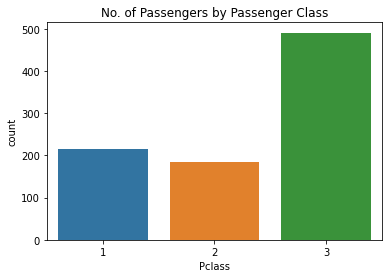

In [10]:
# Use .countplot( ) to obtain the count of the values in the selected field column - 'PClass'
# Use .set_title( ) to give the graph a title  

sns.countplot(x="Pclass", data=df).set_title('No. of Passengers by Passenger Class')

### b) I want to know the proportion of Males and Females in each Passenger class.  
To find the number of people in each passenger class, categorised by Sex

### Findings:  

2.1 There are ***more male passengers than female passengers in total.***  

2.2 ***Across all PClass, there are more male passengers than female passengers***

2.3 There is ***a lot more male passengers than female passengers in PClass 3 ( > 2 times of males compared to females)***.  

2.4 There is ***a lot more male passengers in PClass 3 compared to other PClass***

Text(0.5, 1.0, 'No. of Passengers by Passenger Class & Sex')

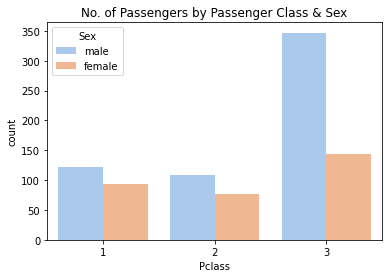

In [30]:
# Use .countplot( ) to obtain the count of the values in the selected field column - 'PClass'  
# Use palette to customise the colours of the data fields in the chart
# Use hue to further breakdown - by 'Sex'
# Use .set_title( ) to give the graph a title  

sns.countplot(x="Pclass", palette="pastel", data=df, hue='Sex').set_title('No. of Passengers by Passenger Class & Sex')

### c) I am curious about whether their Passenger class would affect their Survival probability.  
To find the number of people in each passenger class, categorised by Survived or not

### Findings:  

3.1 ***Most of the passengers who survived are from PClass 1***  

3.2 ***Most of the passengers who did not survive are from PClass 3***  

3.3 The ***probability of survival is approx. 60% for PClass 1 passengers, 50% for PClass 2 passengers and 25% for PClass 3 Passengers***  

3.4 There is ***a lot more passengers in PClass 3 who died compared to those in other PClass*** (about 2 times the number of people in PClass 1 & 2 who died)

In [ ]:
# Use .countplot( ) to obtain the count of the values in the selected field column - 'PClass'  
# Use palette to customise the colours of the data fields in the chart
# Use hue to further breakdown - by 'Survived'
# Use .set_title( ) to give the graph a title 

sns.countplot(x="Pclass", data=df, palette="ch:.25", hue='Survived').set_title('No. of Passengers by Passenger Class, who did and did not survive')

### d) What's the Age ranges of the people onboard Titanic?  
To find the number of people onboard Titanic, categorised by Age ranges

### Findings:   

4.1 ***The passengers' age ranges from 0 - 80 years old***  

4.2 ***Most of the passengers are adults aged 20-40 years old***  

4.3 ***Few of the passengers are elderly and most are aged below 50 years old***.

In [ ]:
# As there are too many unique age values, a histplot would be better choice of chart than a countplot as we can group ages by age ranges
# Use .histtplot( ) to obtain the count of the values in the selected field column - 'Age'  
# Indicate a number in bins to distribute the bars evenly among the age ranges into equal parts i.e. 8 equal parts in the below
# Use .set_title( ) to give the graph a title 

sns.histplot(x='Age', data=df, bins=8).set_title('No. of Passengers by Age range')

### e) I want to know the proportion of Males and Females across the Age ranges.  
To find the number of people onboard Titanic, categorised by Age ranges, breakdown by Sex

### Findings:

5.1 ***Most passengers are male***  

5.2 ***Most males are aged 20-30 years old and there are a lot more in this age range compared to other age ranges***  

5.3 ***There are no females above 70 years old, and the oldest passenger is male***.

In [ ]:
# Use .histtplot( ) to obtain the count of the values in the selected field column - 'Age'  
# Use hue to further breakdown - by 'Sex'
# Indicate the type of multiple to select how we want the bars to be displayed, - dodge means to show the bars of the Sex side by side instead of stacking or layering the bars
# Indicate a number in bins to distribute the bars evenly among the age ranges into equal parts i.e. 8 equal parts in the below
# Use .set_title( ) to give the graph a title 

sns.histplot(x='Age', hue='Sex', multiple='dodge', data=df, bins=8).set_title('No. of Passengers by Age range & Sex')

### f) Did Age and Sex of passengers affect their Survival probability?  
To view the people that did and did not survive by Age and Sex

### Findings:  

6.1 ***Females were a lot more likely to survive compared to male passengers***  

6.2 ***Most of the passengers who did not survive were males aged between 15 to 40 years old***  

6.3 ***Most of the passengers who survived were females aged between 15 to 40 years old***.  

6.4 It looks like ***the oldest passenger onboard Titanic survived***.

Text(0.5, 1.0, 'Sex of Passengers who did and did not survive')

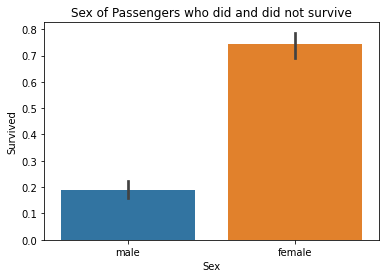

In [38]:
# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.
# A bar plot shows only the mean (or other estimator) value
# Use .barplot( ) to view the relationship between the selected field columns - 'Sex' & 'Survived' with bars
# use .set_title() to set title of charts
sns.barplot(x="Sex", y="Survived", data=df).set_title('Sex of Passengers who did and did not survive')

Text(0.5, 1.0, 'Age and Sex of Passengers who did and did not survive')

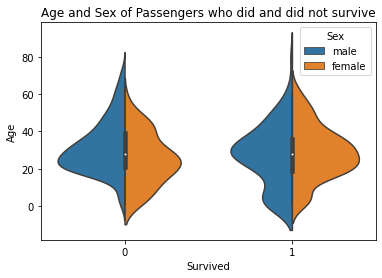

In [17]:
# Use .violinplot( ) shows the distribution of quantitative data across several levels of one (or more) categorical variables (e.g. 'Age' & 'Survived' here) such that those distributions can be compared 
# Use hue to further breakdown - by 'Sex' - as seen by the different coloured areas
# Draw split violins to compare across the hue variable 'Sex', using 'split=True'
# Use .set_title( ) to give the graph a title 

sns.violinplot(x="Survived", y="Age", hue="Sex", data=df, split=True).set_title('Age and Sex of Passengers who did and did not survive')

### g) Did PClass and Sex affect their Survival probability?  
To view Survival probability based on PClass and Sex

### Findings:    

7.1 As the blue and orange dot is near 1.0 for survival for females - ***almost all female passengers in Pclass 1 & 2 survived***  

7.2 Meanwhile, ***about 50% of female passengers in PClass 3 did not survive***  

7.3 ***Male passengers are more likely to die than to survive - less than 40% would survive***.  

7.4 ***The chances of male passengers in PClass 2 & 3 surviving is less than 20%***.

Text(0.5, 1.0, 'Class and Sex of Passengers who did and did not survive')

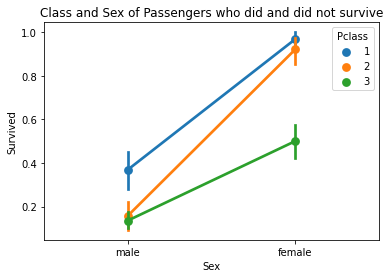

In [28]:
# A point plot represents an estimate of central tendency for a numeric variable by the position of scatter plot points and provides some indication of the uncertainty around that estimate using error bars.
# Use .pointplot( ) to view the relationship between the selected field columns - 'Sex' & 'Survived' with lines
# Use hue to further breakdown - by 'Pclass' - as seen by the different coloured dots and lines
# use .set_title() to set title of charts

sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=df).set_title('Class and Sex of Passengers who did and did not survive')

Text(0.5, 1.0, 'Class and Sex of Passengers who did and did not survive')

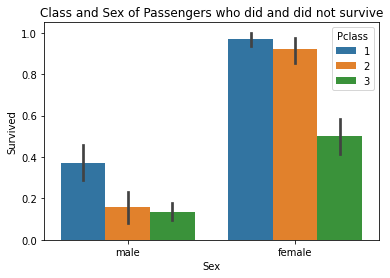

In [102]:
# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.
# A bar plot shows only the mean (or other estimator) value
# Use .barplot( ) to view the relationship between the selected field columns - 'Sex' & 'Survived' with bars
# Use hue to further breakdown - by 'Pclass' - as seen by the different coloured dots and lines
# use .set_title() to set title of charts
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df).set_title('Class and Sex of Passengers who did and did not survive')

### h) Did Port of Embarkation affect their Survival probability?  
To view Survival probability based on passengers' Port of Embarkation

### Findings:    

8.1 ***Those who embarked from Cherbourg Port were about 25% more likely to survive***.  

8.2 Further visualisations showed ***passengers who embarked from Cherbourg Port had a mean smaller Pclass (from 1-3) than other ports of embarkation***, so Pclass could have played a part in the higher survival rate.

8.3 Interestingly, ***passengers who embarked from Cherbourg Port paid, on average, 2-5 times more in ticket prices for the Titanic, compared to passengers from the other 2 Ports of Embarkation,*** so Fares could have played a part in the higher survival rate too.

Text(0.5, 1.0, 'Port of Embarkation of those who did and did not survive')

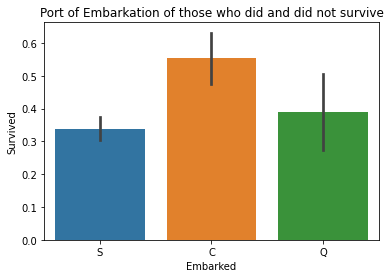

In [100]:
# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.
# A bar plot shows only the mean (or other estimator) value
# Use .barplot( ) to view the relationship between the selected field columns - 'Embarked' & 'Survived' with bars

sns.barplot(x="Embarked", y="Survived", data=df).set_title('Port of Embarkation of those who did and did not survive')

Text(0.5, 1.0, 'Port of Embarkation by their PClass')

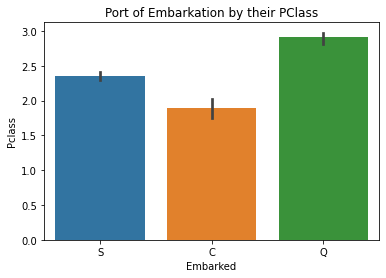

In [101]:
# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.
# A bar plot shows only the mean (or other estimator) value
# Use .barplot( ) to view the relationship between the selected field columns - 'Embarked' & 'Pclass' with bars

sns.barplot(x="Embarked", y="Pclass", data=df).set_title('Port of Embarkation by their PClass')

Text(0.5, 1.0, 'Port of Embarkation by passenger Fares paid')

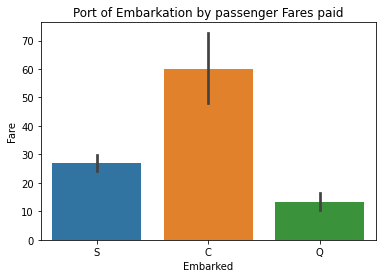

In [99]:
# A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle and provides some indication of the uncertainty around that estimate using error bars.
# A bar plot shows only the mean (or other estimator) value
# Use .barplot( ) to view the relationship between the selected field columns - 'Embarked' & 'Fare' with bars

sns.barplot(x="Embarked", y="Fare", data=df).set_title('Port of Embarkation by passenger Fares paid')